In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

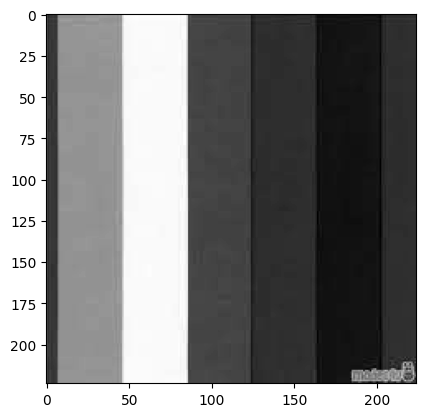

In [3]:
img=cv2.imread("input/rainbow.jpg",0)
plt.imshow(img,cmap='gray')

Evet, OpenCV kütüphanesini kullanarak bir görüntüyü yüklerken kullandığınız cv2.imread fonksiyonundaki ,0 parametresi, görüntünün gri tonlamada (grayscale) okunmasını sağlar. cv2.imread fonksiyonu bir görüntü dosyasını okumak için kullanılır ve bu fonksiyonun ikinci parametresi, görüntünün nasıl okunacağını belirler.<br>

cv2.imread fonksiyonunun ikinci parametresi için kullanılabilecek seçenekler şunlardır:<br>

* cv2.IMREAD_COLOR: Görüntüyü renkli olarak okur. Alfa kanalı dikkate alınmaz. Bu varsayılan moddur ve değeri 1dir.
* cv2.IMREAD_GRAYSCALE: Görüntüyü gri tonlamada okur. Bu modun değeri 0dır.
* cv2.IMREAD_UNCHANGED: Görüntüyü olduğu gibi, alfa kanalı dahil okur. Bu modun değeri -1dir.

In [4]:
print(img.max())
print(img.min())

222
51


In [5]:
# şimdi de threshold gerçekleştireceğiz
ret,thresh1=cv2.threshold(img,127,255,cv2.THRESH_BINARY) # 127 nin altındaki her değeri 0 üstündekini de benim vermiş olduğum 255 yap
# THRESH_BINARY yani 0 ve 1 lerden oluşan sonucu bana döndür

In [7]:
ret # thresh değeriini tutar

127.0

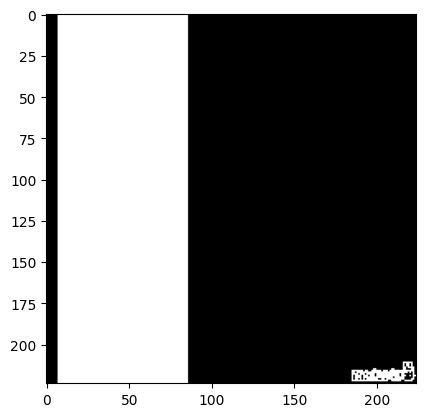

In [8]:
plt.imshow(thresh1,cmap='gray')

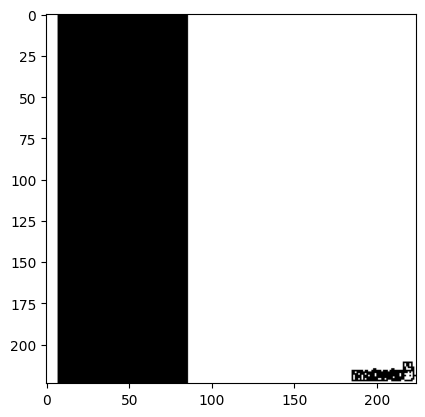

In [10]:
ret,thresh2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) # üsttekinin tam tersi yani 0 ları 255 yaptık 255 olan yerleri 0 yaptık
plt.imshow(thresh2,cmap='gray')

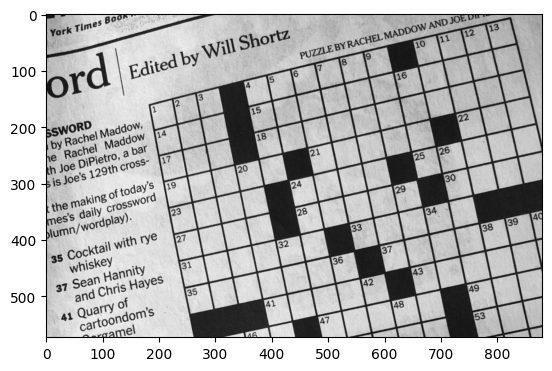

In [15]:
img=cv2.imread("input/crossword.jpg",0)
plt.imshow(img,cmap='gray')

In [16]:
# fotoğrafın size sini değiştirmek için fonksiyon yaızyoruz
def show_pic(img):
    fig=plt.figure(figsize=(15,15))
    ax=fig.add_subplot(111)
    ax.imshow(img,'gray')

### def show_pic(img):
Bu satır, bir matplotlib figürü oluşturur. figsize=(15,15) argümanı, figürün boyutunu inç cinsinden belirtir (genişlik, yükseklik). Bu durumda, oluşturulan figür 15x15 inç boyutlarında olacaktır. Bu, gösterilecek görüntünün boyutunu dolaylı yoldan etkiler, çünkü gösterilen görüntü, bu figürün içine sığdırılacaktır.<br>
### ax=fig.add_subplot(111):
Bu satır, yukarıda oluşturulan figür içine bir subplot (alt grafik) ekler. 111 argümanı, subplot gridinin boyutunu ve hangi subplotun oluşturulduğunu belirtir. 111, aslında 1x1 grid'in 1. subplotunu ifade eder. Bu, figür içinde tek bir grafik alanı olduğu ve bu tek alanın kullanılacağı anlamına gelir.<br>


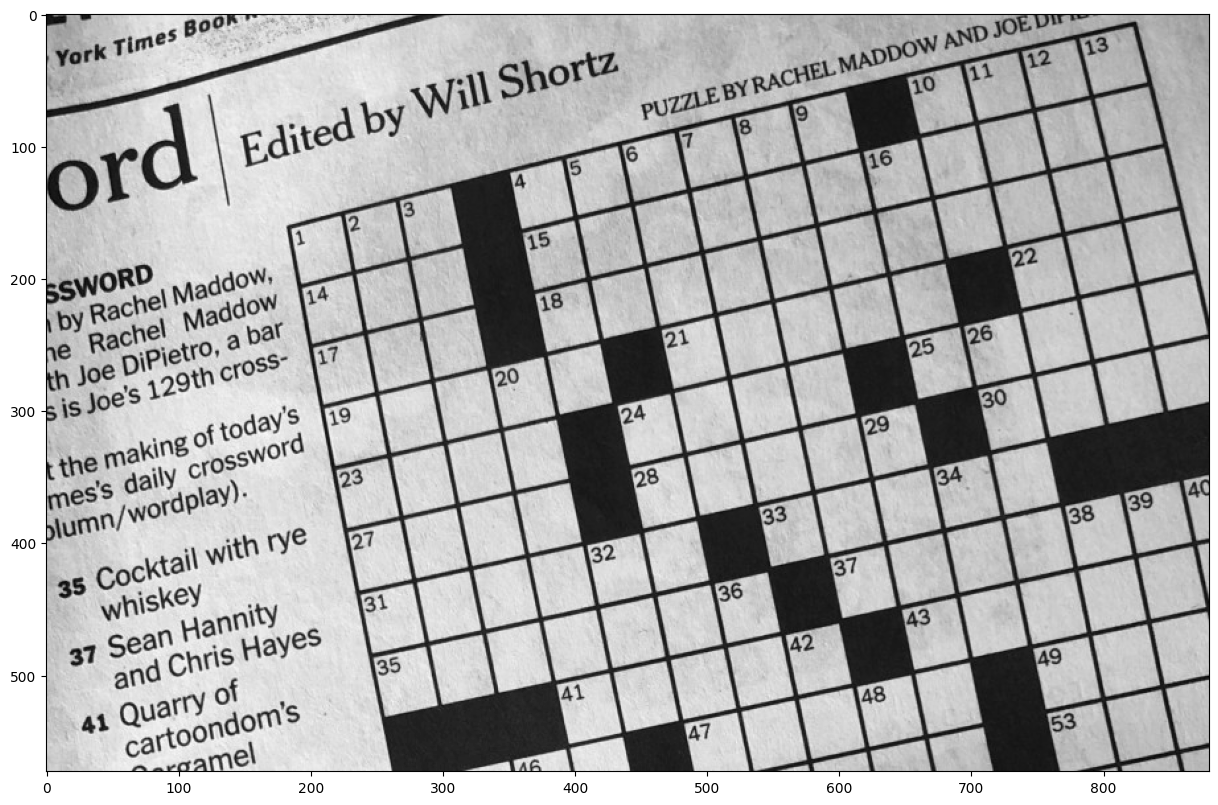

In [17]:
show_pic(img)

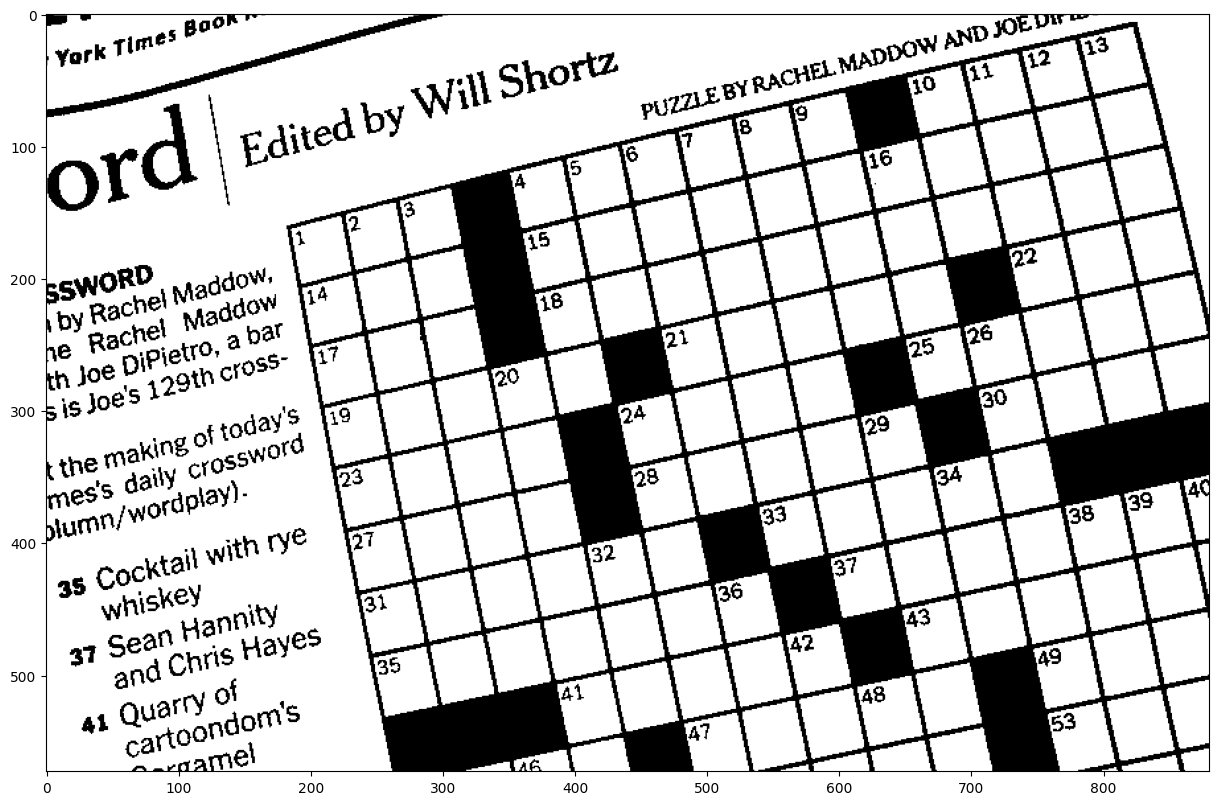

In [18]:
ret,th1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
show_pic(th1)

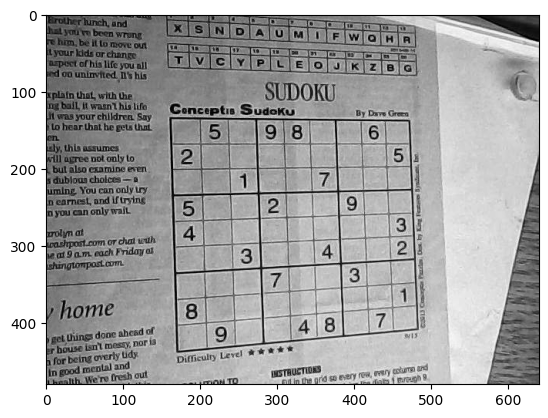

In [20]:
img_1=cv2.imread("input/sudoku.jpg",0)
plt.imshow(img,cmap='gray')

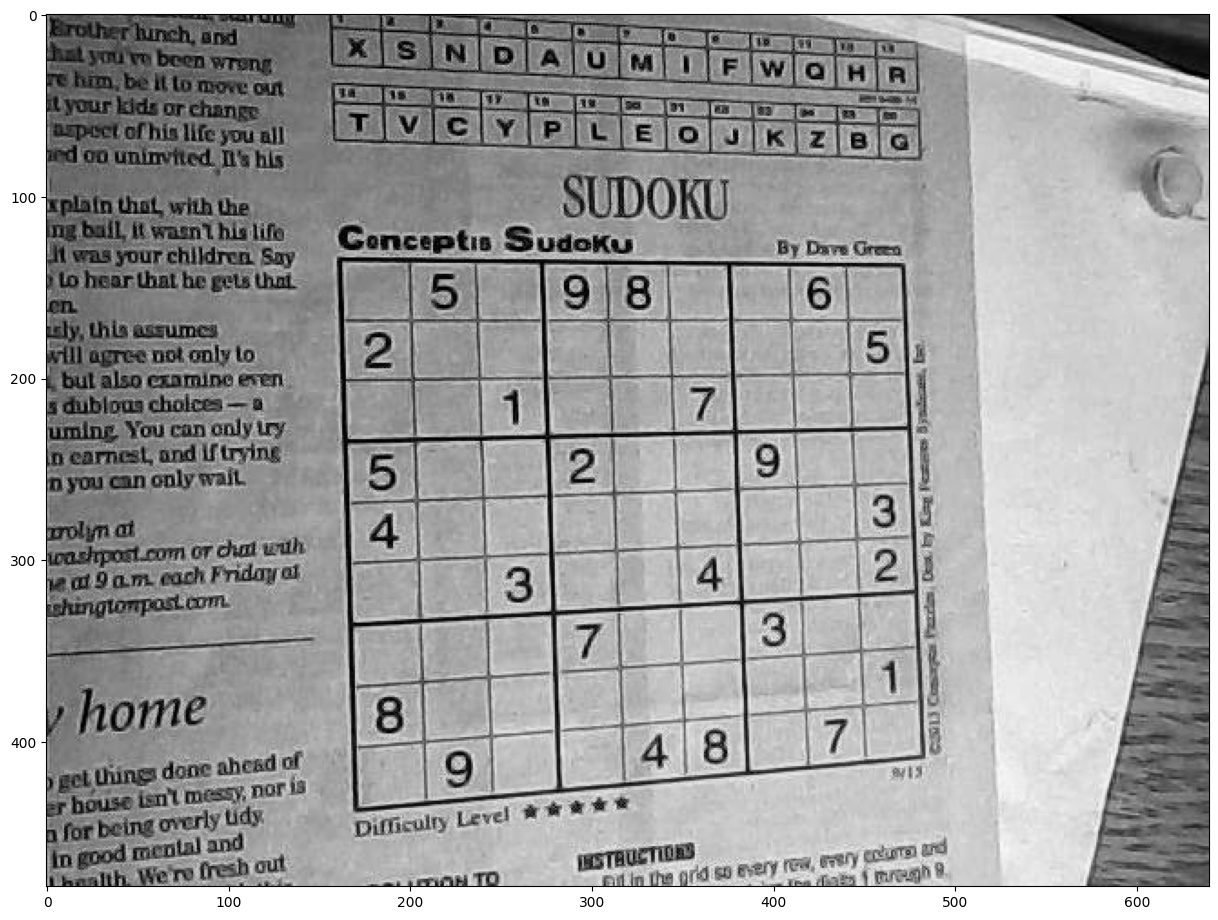

In [21]:
show_pic(img_1)

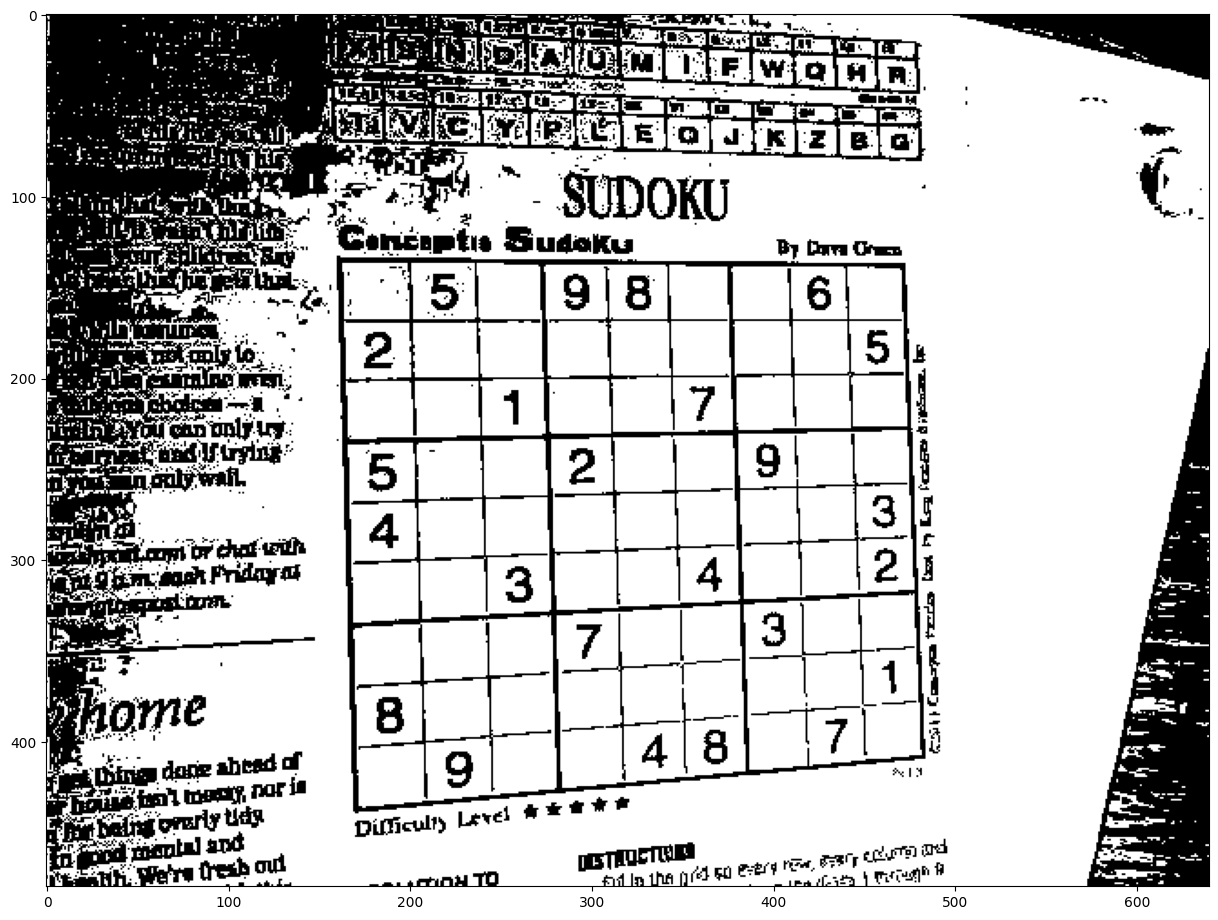

In [22]:
ret,th1=cv2.threshold(img_1,127,255,cv2.THRESH_BINARY)
show_pic(th1)

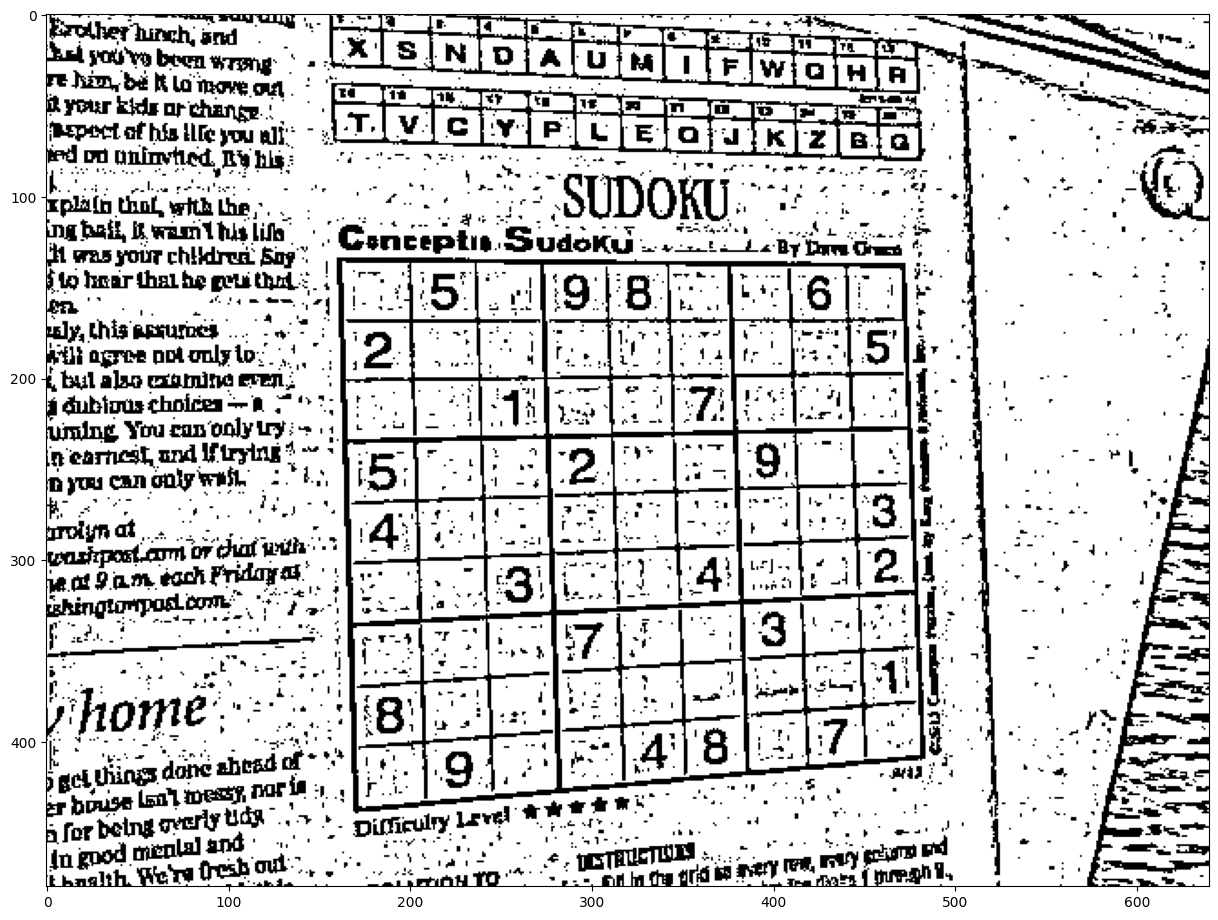

In [23]:
# yukarıda görüğümüz gibi bizim ayarladığımız threshold değeri elverişli olmadı bu yüzden opencv kütüphanesinin fonksiyonlarından yardım alıcaz
th2=cv2.adaptiveThreshold(img_1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8) # ortalama değeri hesaplayıp döndürür # 11 kaç tane komşu hücreyi incelesin diye
# son parametre olan c parametresi yani 8 bir sabittir.
show_pic(th2)

cv2.adaptiveThreshold fonksiyonu, OpenCV kütüphanesinde bulunan ve adaptif eşikleme yöntemini uygulayan bir fonksiyondur. Bu fonksiyon, görüntüdeki her bir piksel için eşik değerinin, pikselin çevresindeki bir alanın değerlerine bağlı olarak otomatik olarak hesaplanmasını sağlar. Bu yöntem, global bir eşik değeri kullanmanın uygun olmadığı durumlar için özellikle faydalıdır, çünkü görüntünün farklı bölgeleri farklı aydınlatma koşullarına sahip olabilir.<br>
### cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
* src: Kaynak görüntü, gri tonlamada olmalıdır.
* maxValue: Eşikleme sonrası pikseller için kullanılacak maksimum değer. Genellikle 255 kullanılır.
* adaptiveMethod: Adaptif eşikleme yöntemini belirler. cv2.ADAPTIVE_THRESH_MEAN_C veya cv2.ADAPTIVE_THRESH_GAUSSIAN_C olabilir. cv2.ADAPTIVE_THRESH_MEAN_C, blok boyutu içindeki piksellerin ortalamasından C çıkarılarak eşik değerinin hesaplanmasını sağlar.
* thresholdType: Eşikleme tipi. Genellikle cv2.THRESH_BINARY veya cv2.THRESH_BINARY_INV kullanılır.
* blockSize: Pikselin eşik değerinin hesaplanması için kullanılacak komşuluk alanının boyutu. Bu değer tek bir pozitif tam sayı olmalıdır.
* C: Ortalama veya ağırlıklı ortalama hesaplanırken her piksel değerinden çıkarılacak sabit bir sayı. Bu değer, yöntemin verdiği sonucu ince ayarlamak için kullanılır.

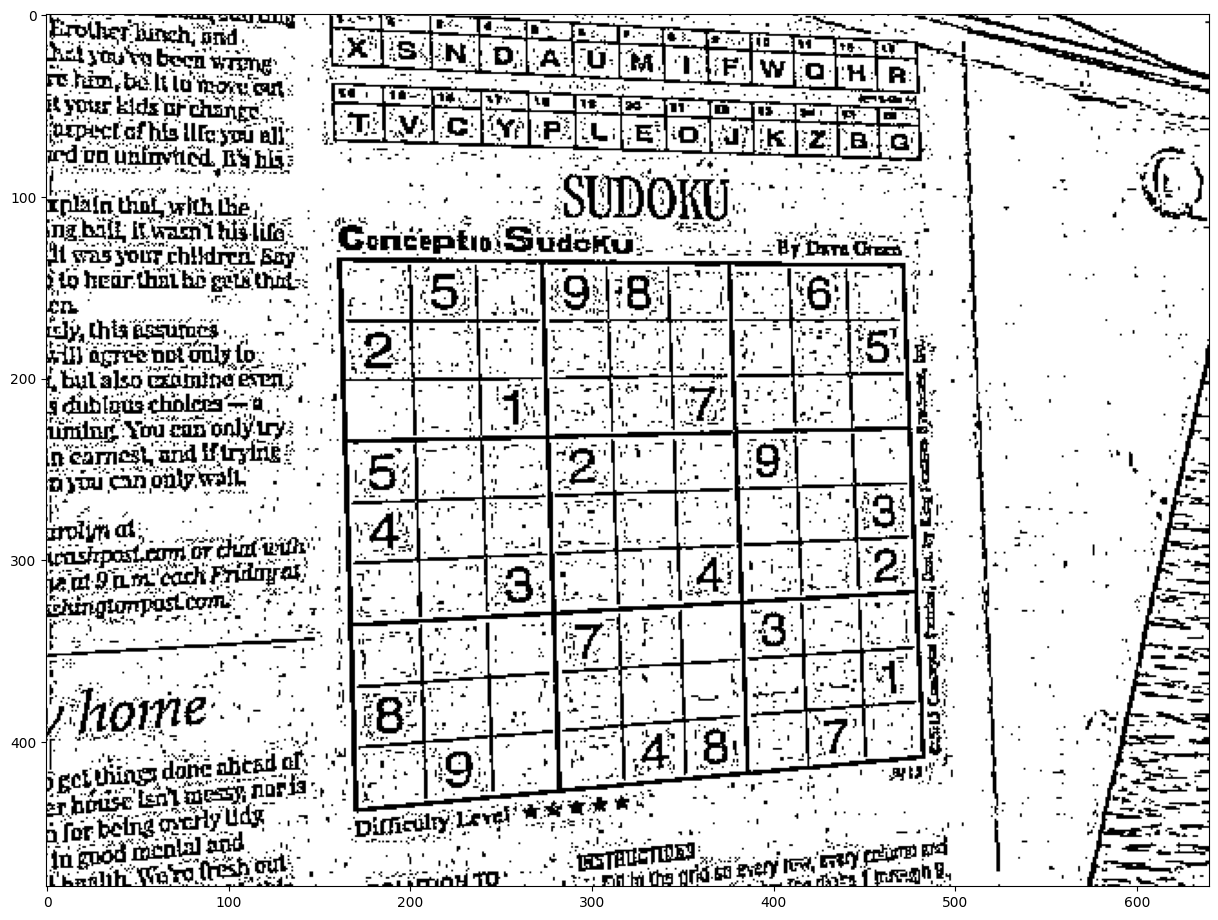

In [26]:
# ADAPTIVE_THRESH_GAUSSIAN_C farkını görmek için
th2=cv2.adaptiveThreshold(img_1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,8)
show_pic(th2)
